In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('S1_Dataset/d1p01M', header=None)
df.columns = [
    'time',
    'frontal accel',
    'vertical accel',
    'lateral accel',
    'antenna id',
    'rssi',
    'phase',
    'frequency',
    'activity',
]
df

,time,frontal accel,vertical accel,lateral accel,antenna id,rssi,phase,frequency,activity
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.42520,924.25,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.73690,921.75,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.03110,923.75,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.03710,921.25,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.89200,920.25,1
...,...,...,...,...,...,...,...,...,...
396,251.00,0.87003,0.46851,0.009122,4,-58.5,0.73631,921.75,1
397,251.25,0.87003,0.46851,0.009122,1,-57.5,0.70870,923.25,1
398,251.50,0.87003,0.46851,0.009122,1,-59.0,0.25157,924.75,1
399,253.25,-0.00938,0.95081,-0.116310,1,-58.5,0.35282,924.25,1


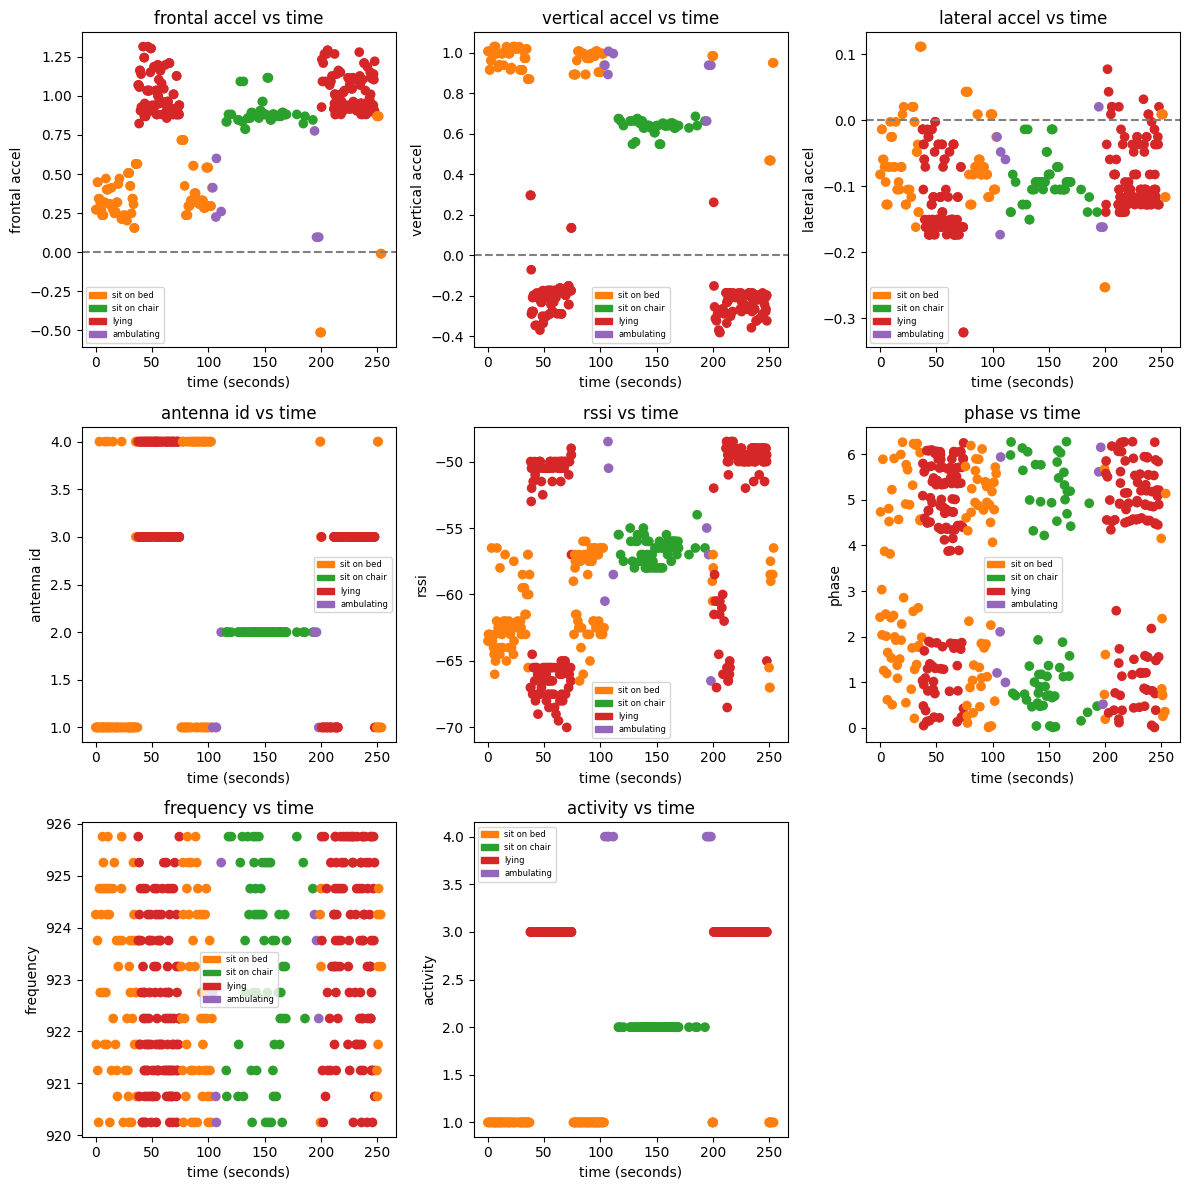

In [5]:
import matplotlib.patches as mpatches

colors = {1: 'C1', 2: 'C2', 3: 'C3', 4: 'C4'}

legend = [
    mpatches.Patch(color='C1', label='sit on bed'),
    mpatches.Patch(color='C2', label='sit on chair'),
    mpatches.Patch(color='C3', label='lying'),
    mpatches.Patch(color='C4', label='ambulating'),
]

plt.figure(figsize=(12, 12))

index = 0
for name in df.columns:
    if name == 'time':
        continue
    index += 1
    x = df['time']
    y = df[name]

    plt.subplot(3, 3, index)
    plt.scatter(x, y, c=df['activity'].map(colors))
    plt.title(f"{name} vs time")
    plt.xlabel('time (seconds)')
    plt.ylabel(name)
    plt.legend(handles=legend, fontsize=6)
    if 'accel' in name:
        plt.axhline(y=0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

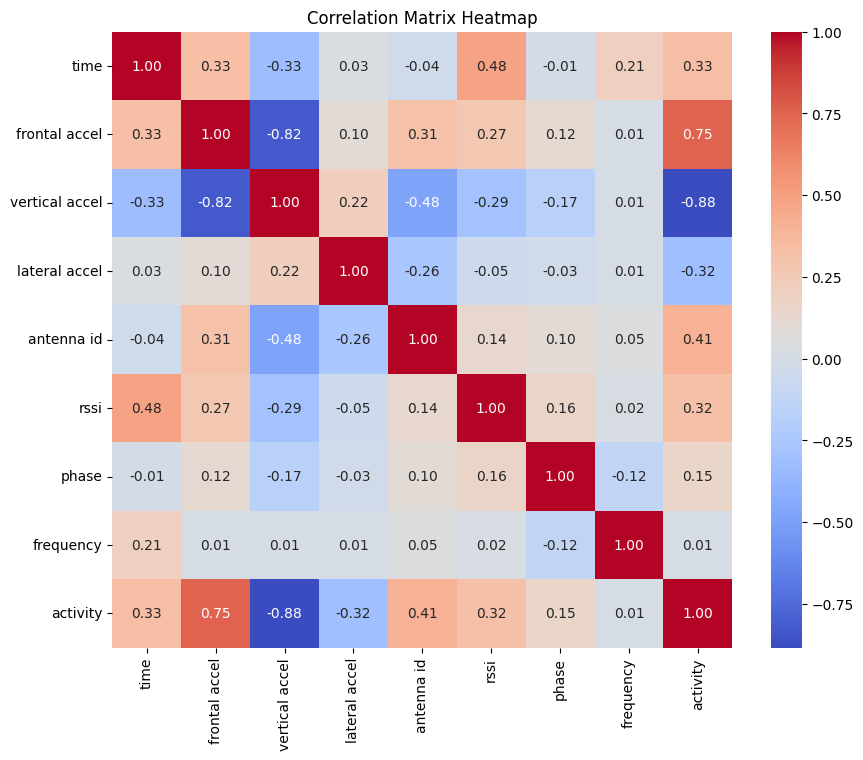

In [3]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()